In [1]:
#importing necesssary packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [3]:
df.shape

(10000, 12)

In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<AxesSubplot:>

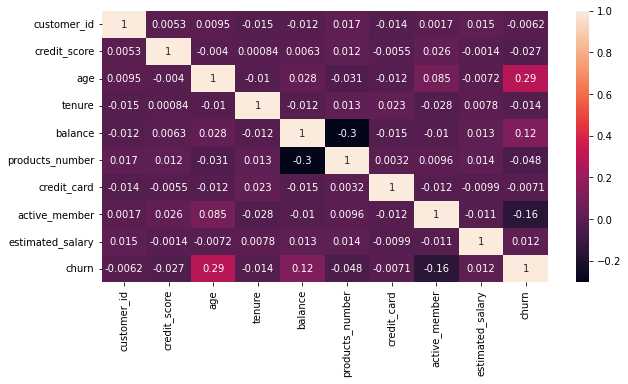

In [6]:
plt.figure(figsize= (10, 5))
sns.heatmap(df.corr(),annot=True)

# preprocessing

In [7]:
#missing values
df.isnull().sum()
#no missing values were found

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
#dropping customer_id column
df.drop('customer_id',axis=1,inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#lable encoding

In [10]:
df['country']=df['country'].astype('category')
df['country']=df['country'].cat.codes
df=pd.get_dummies(df,columns=['country'])

In [11]:
df['gender']=df['gender'].astype('category')
df['gender']=df['gender'].cat.codes
df=pd.get_dummies(df,columns=['gender'])

In [12]:
df.drop(['country_0','gender_0'],axis=1,inplace=True)
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_1,country_2,gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
#checking for imbalance in the target variable
df['churn'].value_counts()
#data imbalance is found

0    7963
1    2037
Name: churn, dtype: int64

In [14]:
X=df.drop('churn',axis=1)
X.head()
print(X.shape)

(10000, 11)


In [15]:
Y=df['churn']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [16]:
! pip install imblearn

In [17]:
#handling imbalance
import imblearn
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()

In [18]:
x,y=over.fit_resample(X,Y)

In [19]:
y.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [20]:
print(x.shape)
print(y.shape)

(15926, 11)
(15926,)


In [21]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

In [22]:
print(xtrain.shape)
print(xtest.shape)

(11148, 11)
(4778, 11)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
Logit=LogisticRegression()
Logit.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
y_test_pred=Logit.predict(xtest)
y_test_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
y_train_pred=Logit.predict(xtrain)
y_train_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#model evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [28]:
#confusion matrix
print(confusion_matrix(ytest,y_test_pred))

[[1528  846]
 [ 770 1634]]


In [29]:
#classification report
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2374
           1       0.66      0.68      0.67      2404

    accuracy                           0.66      4778
   macro avg       0.66      0.66      0.66      4778
weighted avg       0.66      0.66      0.66      4778



In [36]:
#accuracy score
print('The training accuracy is:',accuracy_score(ytrain,y_train_pred))
print('The testing accuracy is:',accuracy_score(ytest,y_test_pred))

The training accuracy is: 0.6644241119483315
The testing accuracy is: 0.6617831728756802


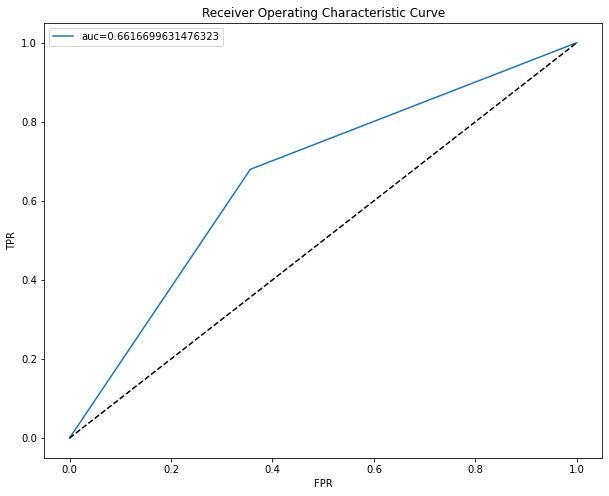

In [31]:
#roc curve
fpr, tpr, threshold = roc_curve(ytest,  y_test_pred)
auc = roc_auc_score(ytest, y_test_pred)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("Receiver Operating Characteristic Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [32]:
#crosss validation score
from sklearn.model_selection import cross_val_score

In [33]:
score=cross_val_score(Logit,x,y,cv=25)

In [34]:
score.mean()

0.6623130564017263